In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir = '/mnt/share/costeffectiveness/results/vivarium_ciff_sam/v7.0.0_full_model_no_x_factor/ciff_sam/2022_03_04_17_34_48/count_data/'

In [3]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'diarrhea_transition_count.csv',
 'wasting_transition_count.csv',
 'diarrhea_state_person_time.hdf',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'diarrhea_state_person_time.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'diarrhea_transition_count.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

# wasting treatment

In [4]:
# start with wasting treatment

wasting_transition_count = pd.read_csv(output_dir + 'wasting_transition_count.csv').drop(columns='Unnamed: 0')
wasting_transition_count.head()

,sex,year,measure,input_draw,scenario,value,diarrhea,sq_lns,mam_treatment,sam_treatment,age
0,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [5]:
mam_tx = (wasting_transition_count
          .loc[(wasting_transition_count.measure.isin(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
                            'severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count']))
              &(wasting_transition_count.mam_treatment=='covered')]
          .groupby(['input_draw','scenario','year']).sum().reset_index())
mam_tx['intervention'] = 'mam_treatment'
mam_tx

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,3775.0,mam_treatment
1,29,baseline,2023,3819.0,mam_treatment
2,29,baseline,2024,3773.0,mam_treatment
3,29,baseline,2025,3896.0,mam_treatment
4,29,baseline,2026,3877.0,mam_treatment
...,...,...,...,...,...
325,946,zinc_supplementation,2022,3198.0,mam_treatment
326,946,zinc_supplementation,2023,5399.0,mam_treatment
327,946,zinc_supplementation,2024,9405.0,mam_treatment
328,946,zinc_supplementation,2025,12256.0,mam_treatment


In [6]:
sam_tx = (wasting_transition_count
          .loc[(wasting_transition_count.measure=='moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count')
              &(wasting_transition_count.sam_treatment=='covered')]
          .groupby(['input_draw','scenario','year']).sum().reset_index())
sam_tx['intervention'] = 'sam_treatment'
sam_tx

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,2724.0,sam_treatment
1,29,baseline,2023,2737.0,sam_treatment
2,29,baseline,2024,2803.0,sam_treatment
3,29,baseline,2025,2815.0,sam_treatment
4,29,baseline,2026,2689.0,sam_treatment
...,...,...,...,...,...
325,946,zinc_supplementation,2022,2564.0,sam_treatment
326,946,zinc_supplementation,2023,2728.0,sam_treatment
327,946,zinc_supplementation,2024,2855.0,sam_treatment
328,946,zinc_supplementation,2025,2855.0,sam_treatment


# sqlns

In [7]:
pt = pd.read_csv(output_dir + 'wasting_state_person_time.csv')
pt.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,diarrhea,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [8]:
pt.age.unique()

array(['early_neonatal', 'late_neonatal', '1-5_months', '6-11_months',
       '12_to_23_months', '2_to_4'], dtype=object)

In [9]:
sqlns = (pt.loc[(pt.age.isin(['6-11_months',
       '12_to_23_months', '2_to_4']))
               &(pt.sq_lns=='covered')]
         .groupby(['input_draw','scenario','year']).sum())[['value']].reset_index()
sqlns['intervention'] = 'sqlns'
sqlns

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,0.000000,sqlns
1,29,baseline,2023,0.000000,sqlns
2,29,baseline,2024,0.000000,sqlns
3,29,baseline,2025,0.000000,sqlns
4,29,baseline,2026,0.000000,sqlns
...,...,...,...,...,...
325,946,zinc_supplementation,2022,0.000000,sqlns
326,946,zinc_supplementation,2023,13899.132101,sqlns
327,946,zinc_supplementation,2024,42101.724846,sqlns
328,946,zinc_supplementation,2025,70611.084189,sqlns


# lbwsg

In [10]:
births = pd.read_csv(output_dir + 'births.csv')
births.head()

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,insecticide_treated_nets,maternal_supplementation,maternal_malnutrition
0,0,female,2022,birth_weight_sum,29,baseline,0.000000e+00,covered,bep,cat2
1,1,female,2022,birth_weight_sum,29,baseline,0.000000e+00,uncovered,bep,cat2
2,2,female,2022,birth_weight_sum,29,baseline,0.000000e+00,covered,mmn,cat2
3,3,female,2022,birth_weight_sum,29,baseline,0.000000e+00,uncovered,mmn,cat2
4,4,female,2022,birth_weight_sum,29,baseline,4.489095e+06,covered,ifa,cat2


In [11]:
births.measure.unique()

array(['birth_weight_sum', 'low_weight_births', 'total_births'],
      dtype=object)

In [12]:
supplementation = (births.loc[(births.measure=='total_births')]
                   .groupby(['input_draw','scenario','year','maternal_supplementation']).sum()
                   [['value']]
                   .reset_index()
                   .rename(columns={'maternal_supplementation':'intervention'}))
supplementation = supplementation.loc[supplementation.intervention!='uncovered']
supplementation

,input_draw,scenario,year,intervention,value
0,29,baseline,2022,bep,0.0
1,29,baseline,2022,ifa,12956.0
2,29,baseline,2022,mmn,0.0
4,29,baseline,2023,bep,0.0
5,29,baseline,2023,ifa,12910.0
...,...,...,...,...,...
1313,946,zinc_supplementation,2025,ifa,0.0
1314,946,zinc_supplementation,2025,mmn,12546.0
1316,946,zinc_supplementation,2026,bep,4485.0
1317,946,zinc_supplementation,2026,ifa,0.0


In [13]:
itns = (births.loc[(births.measure=='total_births')
                              &(births.insecticide_treated_nets=='covered')]
                   .groupby(['input_draw','scenario','year']).sum()
                   [['value']]
                   .reset_index())
itns['intervention'] = 'itns'
itns

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,6075.0,itns
1,29,baseline,2023,6037.0,itns
2,29,baseline,2024,5938.0,itns
3,29,baseline,2025,6143.0,itns
4,29,baseline,2026,6188.0,itns
...,...,...,...,...,...
325,946,zinc_supplementation,2022,5663.0,itns
326,946,zinc_supplementation,2023,6577.0,itns
327,946,zinc_supplementation,2024,8754.0,itns
328,946,zinc_supplementation,2025,10628.0,itns


# zinc

In [14]:
# to do when we get the outputs

In [15]:
ther_zinc = pd.read_csv(output_dir + 'diarrhea_transition_count.csv')
ther_zinc = ther_zinc.loc[(ther_zinc.therapeutic_zinc=='covered')
                         &(ther_zinc.measure=='susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count')]
ther_zinc = ther_zinc.groupby(['input_draw','scenario','year']).sum()[['value']].reset_index()
ther_zinc['intervention'] = 'therapeutic_zinc'
ther_zinc

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,37848.0,therapeutic_zinc
1,29,baseline,2023,38131.0,therapeutic_zinc
2,29,baseline,2024,38963.0,therapeutic_zinc
3,29,baseline,2025,38769.0,therapeutic_zinc
4,29,baseline,2026,38867.0,therapeutic_zinc
...,...,...,...,...,...
325,946,zinc_supplementation,2022,70116.0,therapeutic_zinc
326,946,zinc_supplementation,2023,82105.0,therapeutic_zinc
327,946,zinc_supplementation,2024,104798.0,therapeutic_zinc
328,946,zinc_supplementation,2025,126589.0,therapeutic_zinc


In [16]:
prev_zinc = pd.read_csv(output_dir + 'diarrhea_state_person_time.csv')
prev_zinc = prev_zinc.loc[(prev_zinc.preventative_zinc=='covered')]
prev_zinc = prev_zinc.groupby(['input_draw','scenario','year']).sum()[['value']].reset_index()
prev_zinc['intervention'] = 'preventative_zinc'
prev_zinc

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,0.000000,preventative_zinc
1,29,baseline,2023,0.000000,preventative_zinc
2,29,baseline,2024,0.000000,preventative_zinc
3,29,baseline,2025,0.000000,preventative_zinc
4,29,baseline,2026,0.000000,preventative_zinc
...,...,...,...,...,...
325,946,zinc_supplementation,2022,0.000000,preventative_zinc
326,946,zinc_supplementation,2023,15472.075291,preventative_zinc
327,946,zinc_supplementation,2024,47021.233402,preventative_zinc
328,946,zinc_supplementation,2025,78713.564682,preventative_zinc


# all interventions


This dataframe gives us the total ANNUAL number of services provided for each intervention in each simulated scenario, by draw. This should be compared with simulation outcomes in count space to calculate ICERs (or converted to rate space to calculate costs per population size). 

Note:

- SQ-LNS and prevenative zinc are measures of person-time rather than counts... it is equivalent to the count of yearly provisions
- For maternal supplementation and insecticide treated nets, we consider coverage only among live births. However, this will be an underestimate of total population coverage of these interventions given that some mothers covered by the interventions will result in stillbirths. We should consider either: a) noting this in our limitations, or b) incorporating this into our cost model using the stillbirth to live birth ratio covariate
    - Also, we do not consider the delay in coverage to account for gestation

In [27]:
data = pd.concat([sam_tx,
                 mam_tx,
                 sqlns,
                 supplementation,
                 itns,
                 prev_zinc,
                 ther_zinc])
data

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,2724.0,sam_treatment
1,29,baseline,2023,2737.0,sam_treatment
2,29,baseline,2024,2803.0,sam_treatment
3,29,baseline,2025,2815.0,sam_treatment
4,29,baseline,2026,2689.0,sam_treatment
...,...,...,...,...,...
325,946,zinc_supplementation,2022,70116.0,therapeutic_zinc
326,946,zinc_supplementation,2023,82105.0,therapeutic_zinc
327,946,zinc_supplementation,2024,104798.0,therapeutic_zinc
328,946,zinc_supplementation,2025,126589.0,therapeutic_zinc


# import costs

In [35]:
costs = pd.read_csv('ciff_costs.csv').rename(columns={'intervention_name':'intervention'})
costs.head()

,intervention,year,cost_per_service
0,sam_treatment,2022,57.6
1,sam_treatment,2023,57.6
2,sam_treatment,2024,57.6
3,sam_treatment,2025,57.6
4,sam_treatment,2026,57.6


In [39]:
sim_costs = data.merge(costs, on=['intervention','year'])
sim_costs['total_cost'] = sim_costs['value'] * sim_costs.cost_per_service
sim_costs = sim_costs.groupby(['input_draw','year','scenario']).sum()[['total_cost']].rename(columns={'total_cost':'value'})
sim_costs

value
input_draw year scenario                          
29         2022 baseline              3.072960e+05
                lbwsg_interventions   3.072960e+05
                mam_treatment         3.072960e+05
                sam_treatment         3.072960e+05
                sqlns                 3.072960e+05
...                                            ...
946        2026 lbwsg_interventions   2.764153e+06
                mam_treatment         7.276693e+05
                sam_treatment         3.638529e+05
                sqlns                 2.602164e+06
                zinc_supplementation  2.976099e+06

[330 rows x 1 columns]

In [42]:
sim_cost_baseline = (sim_costs.reset_index().loc[sim_costs.reset_index().scenario=='baseline']
                     .set_index(['input_draw','year'])[['value']])
incremental_cost = sim_costs - sim_cost_baseline
incremental_cost

value
input_draw year scenario                          
29         2022 baseline              0.000000e+00
                lbwsg_interventions   0.000000e+00
                mam_treatment         0.000000e+00
                sam_treatment         0.000000e+00
                sqlns                 0.000000e+00
...                                            ...
946        2026 lbwsg_interventions   2.478487e+06
                mam_treatment         4.420032e+05
                sam_treatment         7.818690e+04
                sqlns                 2.316498e+06
                zinc_supplementation  2.690433e+06

[330 rows x 1 columns]

In [57]:
cols = ['input_draw','year','scenario']

ylds = pd.read_csv(output_dir + 'ylds.csv').groupby(cols).sum()[['value']]
ylls = pd.read_csv(output_dir + 'ylls.csv').groupby(cols).sum()[['value']]
dalys = ylds + ylls
dalys.head()

value
input_draw year scenario                         
29         2022 baseline             90034.620975
                lbwsg_interventions  90034.620975
                mam_treatment        90034.620975
                sam_treatment        90034.620975
                sqlns                90034.620975

In [59]:
dalys_baseline = dalys.reset_index().loc[dalys.reset_index().scenario=='baseline'].set_index(['input_draw','year'])[['value']]
dalys_averted = dalys_baseline - dalys
dalys_averted.head()

value
input_draw year scenario                  
29         2022 baseline               0.0
                lbwsg_interventions    0.0
                mam_treatment          0.0
                sam_treatment          0.0
                sqlns                  0.0

# ICERs

In [63]:
icers_by_year = (incremental_cost / dalys_averted).reset_index()
icers_by_year.head()

,input_draw,year,scenario,value
0,29,2022,baseline,NaN
1,29,2022,lbwsg_interventions,NaN
2,29,2022,mam_treatment,NaN
3,29,2022,sam_treatment,NaN
4,29,2022,sqlns,NaN


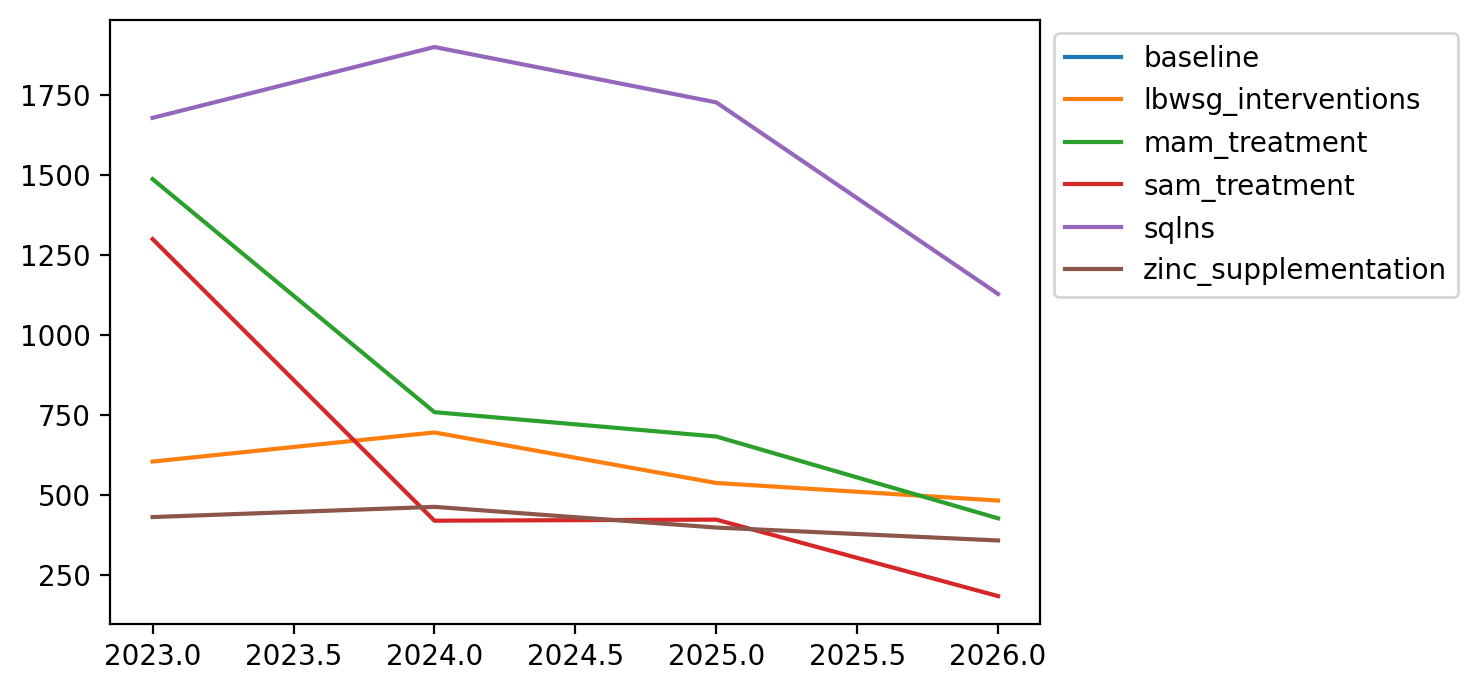

In [74]:
plt.figure(dpi=200)
for scenario in icers_by_year.scenario.unique():
    p = icers_by_year.loc[(icers_by_year.scenario==scenario)&(icers_by_year.year!=2022)]
    p = p.groupby('year').describe(percentiles=[0.025,0.975]).reset_index()
    plt.plot(p.year, p['value','mean'], label=scenario)
    #plt.fill_between(p.year, p['value','2.5%'], p['value','97.5%'], alpha=0.2)
plt.legend(bbox_to_anchor=[1,1])